<a href="https://colab.research.google.com/github/EamonCabral/python-tutorials/blob/main/MACD_Stocks_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# This file was created by Emmanuel (Eamon) Cabral following a tutorial from youtuber: Computer Science
# Many thanks to the owner of the video and I take no authorship on this code
# This Notebook has been shared to provide a resource on how to use Google Colab
# As well as to analyze historical data and compute MACD/Trading signals for any stocks
# I am using TSLA for my own analysis, but feel free to use any stock you'd like
# Definition (Bull): An upward (raising) trend in stock prices
# Definition (Bear): An downward (decreasing) trend in stock prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [46]:
# Load data
from google.colab import files
uploaded = files.upload()

# You will be asked to upload a CSV file containing your stock's historical data
# for this tutorial, I am using TSLA, you can find it in this link:
# https://finance.yahoo.com/quote/TSLA/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAADmZoogMnubXP-o7Y-O5MCXyH0W1q9v-f4dIpFOf38SIHz72TTU1vXnaueGSOf43Uj3zoqK4phxSD3QM8YMiI4K3ASaO1rI8-5UqbCTwxMyXNzPvuRg_eZ1zyFFtAWYakzwdF9V47bXlHoehAW5T-oL2LxNlo2oG6FYs-0iLjAVz

Saving TSLA.csv to TSLA (3).csv


In [47]:
# Store Data into data frame
df = pd.read_csv('TSLA.csv')

# Display data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
1,2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
3,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100
4,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600
...,...,...,...,...,...,...,...
247,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,1213.859985,34628500
248,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,25397400
249,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,1222.089966,21579900
250,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,1162.939941,33445700


In [48]:
# In data frame, set date as the index

df_bakcup = df
df = df.set_index(pd.DatetimeIndex(df['Date']))
del df['Date']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100
2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600
...,...,...,...,...,...,...
2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,1213.859985,34628500
2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,25397400
2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,1222.089966,21579900


<function matplotlib.pyplot.show>

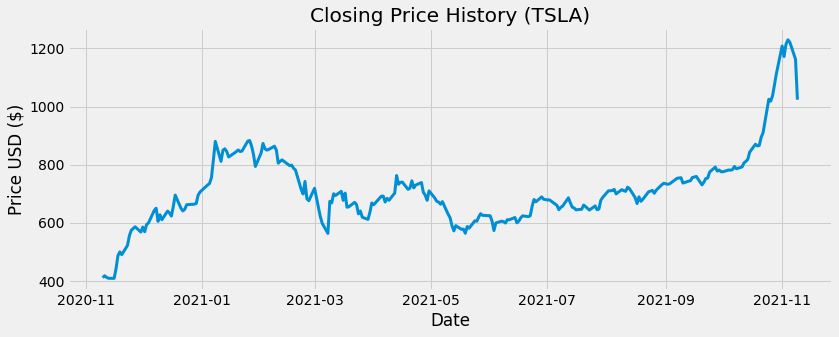

In [49]:
# Visualize the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label= 'Closing price', linewidth=3)
plt.title('Closing Price History (TSLA)')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show

In [50]:
# calculate MACD and Signal
EMA12 = df.Close.ewm(span=12, adjust=False).mean()
EMA26 = df.Close.ewm(span=26, adjust=False).mean()

# Calculating the MACD
MACD = EMA12 - EMA26

# calculate Signal
signal = MACD.ewm(span=9, adjust=False).mean()


<function matplotlib.pyplot.show>

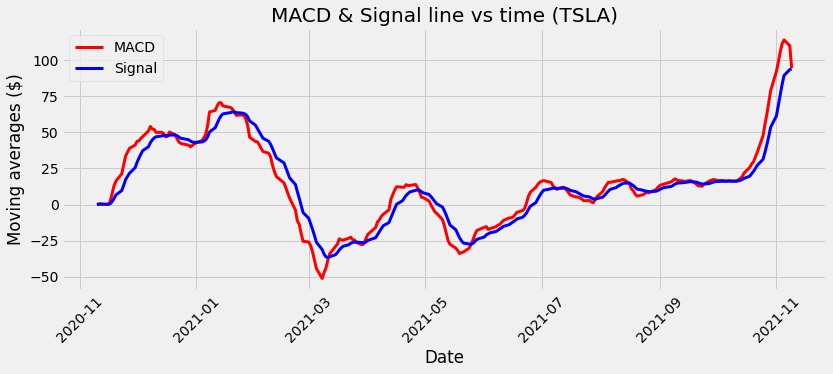

In [58]:
# Visualize the MACD and Signal
plt.figure(figsize=(12.2,4.5))
plt.plot(MACD, label= 'MACD', linewidth=3, color='red')
plt.plot(signal, label= 'Signal', linewidth=3, color='blue')
plt.title('MACD & Signal line vs time (TSLA)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Moving averages ($)')
plt.legend(loc = 'upper left')
plt.show

# Notice that, the stock is on an upward trend when MACD > Signal (Bull)
# Similarly, when Signal > MACD, stock is on a downward trend (Bear)

# At each point where the two curves cross, a new trend begins 
# This will be the basis for our signal flagging

In [52]:
# Add the new data to the data frame

df['MACD'] = MACD
df['signal'] = signal
df

,Open,High,Low,Close,Adj Close,Volume,MACD,signal
Date,,,,,,,,
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200,0.000000,0.000000
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700,0.540059,0.108012
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100,0.528651,0.192140
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,0.253632,0.204438
2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,0.002563,0.164063
...,...,...,...,...,...,...,...,...
2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,1213.859985,34628500,105.881914,76.251533
2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,25397400,111.610961,83.323419
2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,1222.089966,21579900,114.203788,89.499493


In [53]:
def buy_sell(signal):
  buy = []
  sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['signal'][i]:
      sell.append(np.nan) # Remember, when MACD > Signal, we don't want to sell (Bull)
      if flag != 1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal['MACD'][i] < signal['signal'][i]:
      buy.append(np.nan) # Remember, when Signal > MACD, we dont want to buy (Bear)
      if flag != 0:
        sell.append(signal['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      sell.append(np.nan)
      buy.append(np.nan)

  return (buy, sell)

In [54]:
# create buy and sell column

a = buy_sell(df)
df['buy_signal'] = a[0]
df['sell_signal'] = a[1]
df

,Open,High,Low,Close,Adj Close,Volume,MACD,signal,buy_signal,sell_signal
Date,,,,,,,,,,
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200,0.000000,0.000000,NaN,NaN
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700,0.540059,0.108012,417.130005,NaN
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100,0.528651,0.192140,NaN,NaN
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,0.253632,0.204438,NaN,NaN
2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600,0.002563,0.164063,NaN,408.089996
...,...,...,...,...,...,...,...,...,...,...
2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,1213.859985,34628500,105.881914,76.251533,NaN,NaN
2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,25397400,111.610961,83.323419,NaN,NaN
2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,1222.089966,21579900,114.203788,89.499493,NaN,NaN


<function matplotlib.pyplot.show>

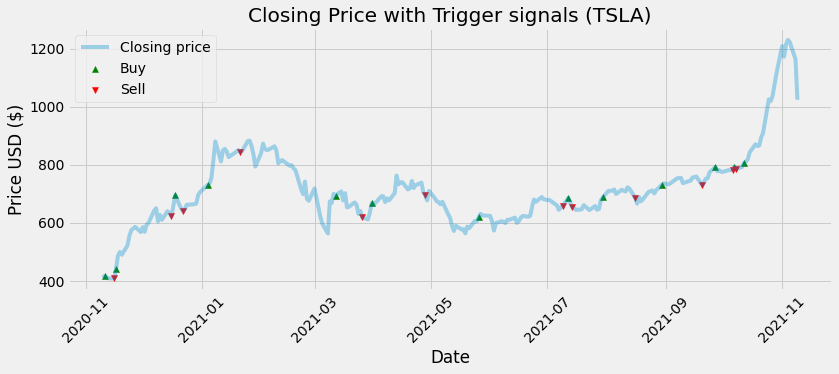

In [55]:
# Visualize the stock price
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['buy_signal'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(df.index, df['sell_signal'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(df['Close'], label= 'Closing price', alpha = 0.35)
plt.title('Closing Price with Trigger signals (TSLA)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price USD ($)')
plt.legend(loc= 'upper left')
plt.show